# Covid19-Model Notebook

In this Notebook you can see covid 19 cases and deaths from all countries. The WHO-Covid19 database is used in this notebook.

In [1]:
import requests, io
import pandas as pd
import matplotlib.pyplot as plt;

In [2]:
# Server request.
response = requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv")

# Check status.
if response.status_code == 200:
    # Encoding without BOM.
    response.encoding = 'utf-8-sig'
else:
    print("Error in API Request")

# Covert response to dataframe.
dataframe = pd.read_csv(io.StringIO(response.text))

In this section you select a country and extract the country data from the dataframe.

In [3]:
COUNTRY = "Germany"

# Extract country data.
df_country = dataframe[dataframe["Country"].str.fullmatch(COUNTRY)]

This is an example how you can get data from the dataframe and plot it for a country.

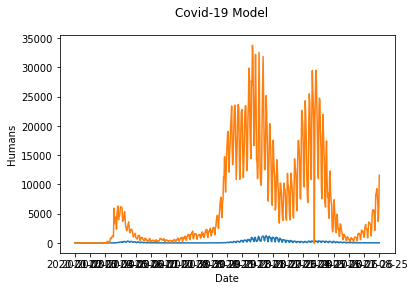

In [4]:
deaths = df_country["New_deaths"]
cases = df_country["New_cases"]

# Generate figure and plot
fig, plot = plt.subplots(1)

# Set title, x-axe, y-axe
fig.suptitle('Covid-19 Model')
plot.set_xlabel('Date')
plot.set_ylabel('Humans');

# Set ticks
plot.set_xticks(range(0,len(df_country),30))

# Plot data
plot.plot(
    df_country['Date_reported'],
    deaths,
    label='{country_name}: Deaths'.format(country_name=COUNTRY)
)

plot.plot(
    df_country['Date_reported'],
    cases,
    label='{country_name}: Cases'.format(country_name=COUNTRY)
)